In [ ]:
import os
import geopandas as gpd
import pandas as pd
import sys
import seaborn as sns

# Add project root to Python path
project_root = "/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work"
if project_root not in sys.path:
    sys.path.append(project_root)

from geofunctions import utils
import matplotlib.pyplot as plt

### Upload monthly remote work shares by individual

In [ ]:
months = utils.return_list_months_ok()

In [ ]:
list_months = []
for MONTH in months:
    print(MONTH)
    try:
        df_part = pd.read_csv(
            utils.get_path(
                "processed", "dwells", f"remote_work/user_remote_work_{MONTH}.csv"
            )
        )
        df_part["month"] = MONTH
        list_months.append(df_part)
    except:
        pass

201901
201904
201907
201908
201909
201910
201911
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [4]:
df_shares = pd.concat(list_months)

In [ ]:
df_shares = df_shares[df_shares.month != "202206"]
df_shares = df_shares.iloc[:, :-7]

In [6]:
df_shares.head()

,Unnamed: 0,identifier,identifier_type,remote_work_days,total_work_days,remote_work_days_smooth,remote_work_days_min_work,flag_remote_work_smoothed_max,flag_remote_work_smoothed_max_thresh,remote_work_share,remote_work_share_smooth,remote_work_share_min_work,month
0,0.0,00043c1c-bb6e-434c-8848-cd5bea2161a6,IDFA,0.0,16.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,201901
1,1.0,003b6189-ca3d-46e8-91aa-f9c271a8826e,GAID,5.0,12.0,5.0,3.0,0.185700,0.250000,0.416667,0.416667,0.250000,201901
2,2.0,0051f3fc-32d7-4686-ac58-214c62d6efd5,IDFA,2.0,20.0,2.0,0.0,0.043584,0.000000,0.100000,0.100000,0.000000,201901
3,3.0,0052e839-ea74-4c11-9c4a-2527e12126ff,IDFA,3.0,15.0,3.0,3.0,0.122194,0.200000,0.200000,0.200000,0.200000,201901
4,4.0,00596205-d7d0-4067-ae1b-dbe358625f14,IDFA,4.0,22.0,5.0,4.0,0.101286,0.181818,0.181818,0.227273,0.181818,201901


In [ ]:
REMOTE_WORK_FEATURE = "flag_remote_work_smoothed_max_thresh"

### Upload monthly home locations dataset

In [ ]:
months_files = os.listdir(utils.get_path("processed", "dwells", "work"))
months_files = [f for f in months_files if f.endswith(".csv")]

In [23]:
full_home_list = []

In [ ]:
# import gc
# for monthly_file in sorted(months_files):

#     MONTH = monthly_file.split("_")[-1][:-4]
#     print(MONTH)
#     # Layer with Home location
#     home_df = pd.read_csv(
#         os.path.join(
#             utils.get_path("processed", "dwells", "home"),
#             f"home_geohashes_night_shabbat_{MONTH}.csv",
#         )
#     )
#     home_df ['month']=MONTH
#     df_shares_home = home_df.merge(df_shares, on = ['month','identifier'])
#     df_shares_home_census = df_shares_home.merge(
#     gdf_census_gush[["geohash", "YISHUV_STAT_2022"]], on="geohash"
# )
#     df_shares_census = df_shares_home_census.groupby(['month',"YISHUV_STAT_2022"])['flag_remote_work_smoothed_max_thresh'].mean().reset_index()
#     # df_shares_home_census= utils.make_gdf(df_shares_home_census, crs=4326, geometry="geometry")

# list_shares.append(df_shares_census)
# gc.collect()

In [ ]:
for monthly_file in sorted(months_files):

    MONTH = monthly_file.split("_")[-1][:-4]
    print(MONTH)
    # Layer with Home location
    home_df = pd.read_csv(
        os.path.join(
            utils.get_path("processed", "dwells", "home"),
            f"home_geohashes_night_shabbat_{MONTH}.csv",
        )
    )
    home_df["month"] = MONTH

    full_home_list.append(home_df)

201901
201904
201907
201908
201909
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [25]:
home_df_full = pd.concat(full_home_list)

In [26]:
home_df_full.head()

,Unnamed: 0,identifier,geohash,night_hours_count,nights_count,rank_night,shabbat_hours_counts,rank_shabbat,weight,rank_weighted,...,date_work_home,hour_work_all,date_work_all,share_work_in_home_hours,share_home_work_hours,share_work_in_home_days,share_home_work_days,share_home_hours_home,flag_frequent_user,month
0,0,00043c1c-bb6e-434c-8848-cd5bea2161a6,swntzcx,21.0,8.0,1.0,2.0,2.0,23.0,1.0,...,5.0,88.0,23.0,0.148936,0.079545,0.227273,0.217391,0.489362,True,201901
1,1,0027d451-3650-490d-ac32-3974fd3bdf65,swnvbdq,4.0,3.0,1.0,1.0,1.0,5.0,1.0,...,1.0,6.0,2.0,0.166667,0.666667,0.250000,0.500000,0.208333,False,201901
2,2,003b6189-ca3d-46e8-91aa-f9c271a8826e,swntvne,11.0,7.0,1.0,6.0,1.0,17.0,1.0,...,2.0,14.0,7.0,0.117647,0.285714,0.200000,0.285714,0.500000,True,201901
3,3,003baf55-9d79-45f8-9efe-02eaba1502d0,swnywkk,10.0,5.0,1.0,4.0,1.0,14.0,1.0,...,1.0,1.0,1.0,0.045455,1.000000,0.200000,1.000000,0.636364,False,201901
4,4,0051f3fc-32d7-4686-ac58-214c62d6efd5,swnyb4m,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,4.0,64.0,20.0,0.666667,0.218750,1.333333,0.200000,0.047619,True,201901


### Upload matching between geohash stat area

In [ ]:
geohash_statarea = gpd.read_file(
    (utils.get_path("processed", "adm", "geohash_stat_area_pairs.geojson"))
)

In [35]:
geohash_statarea.head()

,geohash,index_right,OBJECTID,SHEM_YISHUV_HEB,SHEM_YISHUV_ENG,SEMEL_YISHUV,YISHUV_STAT_2022,STAT_2022,Stat2022_Unite,Stat2022_Ref,Main_Function_Code,Main_Function_Txt,ROVA,TAT_ROVA,geometry
0,swnt5jy,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66049 31.7807, 34.66049 31.78207,..."
1,swnt5tz,10,76,אשדוד,ASHDOD,70,700142,142.0,142,NaN,1.0,מגורים,1.0,14.0,"POLYGON ((34.66049 31.80405, 34.66049 31.80542..."
2,swnt5nn,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66187 31.7807, 34.66187 31.78207,..."
3,swnt5np,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66187 31.78207, 34.66187 31.78345..."
4,swnt5q0,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66187 31.78345, 34.66187 31.78482..."


### Merge 3 layers and calculate avg remote work

In [ ]:
df_merge = (
    df_shares[["identifier", REMOTE_WORK_FEATURE, "month"]]
    .merge(
        home_df_full[["identifier", "geohash", "month"]],
        on=["identifier", "month"],
        how="inner",
    )
    .merge(geohash_statarea, on="geohash", how="inner")
)

In [51]:
df_wfh_stat_areas = df_merge.groupby(["SHEM_YISHUV_HEB", "YISHUV_STAT_2022", "month"])[
    REMOTE_WORK_FEATURE
].agg(["count", "mean"])

In [52]:
df_wfh_stat_areas = df_wfh_stat_areas.reset_index()

## Add stat areas geometry

In [53]:
gdf_census = gpd.read_file(utils.get_path("processed","adm","census_areas_gushdan.geojson"))

In [54]:
df_wfh_stat_areas = gdf_census[["YISHUV_STAT_2022","geometry"]].merge(df_wfh_stat_areas, on ="YISHUV_STAT_2022", how='left')

In [55]:
df_wfh_stat_areas.isnull().mean()

YISHUV_STAT_2022    0.000000
geometry            0.000000
SHEM_YISHUV_HEB     0.001069
month               0.001069
count               0.001069
mean                0.001069
dtype: float64

In [56]:
df_wfh_stat_areas.shape

(53336, 6)

In [66]:
df_wfh_stat_areas = df_wfh_stat_areas.rename(columns={'count':'num_homes', 'mean':'WFH_mean'})

In [67]:
df_wfh_stat_areas.loc[21170]

YISHUV_STAT_2022                                             26400011
geometry            MULTIPOLYGON (((34.95995262374844 32.111572833...
SHEM_YISHUV_HEB                                              ראש העין
month                                                          202303
num_homes                                                         2.0
WFH_mean                                                          0.0
Name: 21170, dtype: object

In [72]:
df_wfh_stat_areas.shape

(53336, 6)

In [76]:
df_wfh_stat_areas['YISHUV_STAT_2022'] = df_wfh_stat_areas['YISHUV_STAT_2022'].astype(str)

### A bit simplify geometry

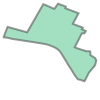

In [83]:
df_wfh_stat_areas.iloc[0]["geometry"]

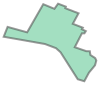

In [87]:
tolerance = 0.0001
df_wfh_stat_areas.iloc[0]["geometry"].simplify(tolerance, preserve_topology=True)

In [ ]:
import geopandas as gpd

# Load your GeoDataFrame (assuming it's already loaded as `gdf`)
# Adjust the tolerance value to control the level of simplification
tolerance = 0.0001

# Simplify the geometry column
df_wfh_stat_areas["geometry"] = df_wfh_stat_areas["geometry"].simplify(tolerance, preserve_topology=True)



In [94]:
df_wfh_stat_areas = df_wfh_stat_areas[df_wfh_stat_areas['SHEM_YISHUV_HEB']!='אשדוד']

In [108]:
df_wfh_stat_areas['YISHUV_STAT_2022'].dtype

dtype('O')

In [100]:
df_wfh_stat_areas= df_wfh_stat_areas[~df_wfh_stat_areas['month'].isnull()]

In [105]:
df_wfh_stat_areas['month'] = pd.to_datetime(df_wfh_stat_areas['month'], format='%Y%m')

In [106]:
df_wfh_stat_areas.to_file("../data/key-results/remote_work_stat_areas_030325.geojson")